# MNIST Classification with PCA and Gaussian Naive Bayes

This notebook demonstrates a comprehensive approach to classifying handwritten digits using the MNIST dataset. It explores the application of Gaussian Naive Bayes for classification and uses Principal Component Analysis (PCA) to reduce dimensionality. The workflow includes:

1. Loading and preprocessing the MNIST dataset.
2. Evaluating model performance without dimensionality reduction.
3. Applying PCA to optimize model efficiency and reduce computation.
4. Hyperparameter tuning to enhance model accuracy.
5. Visualizing and interpreting results to determine the optimal settings.

Through this step-by-step analysis, the notebook highlights the impact of PCA on computational performance and model accuracy.


Cell 1: Import necessary libraries


In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import numpy as np


Cell 2: Load the MNIST dataset and split it into training and testing sets



In [4]:
# Load MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"]

# Split the dataset into training and testing sets (test size = 1/7 of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)

# Normalize the pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0


Cell 3: Train and evaluate the model without PCA



Accuracy without PCA: 56.04%


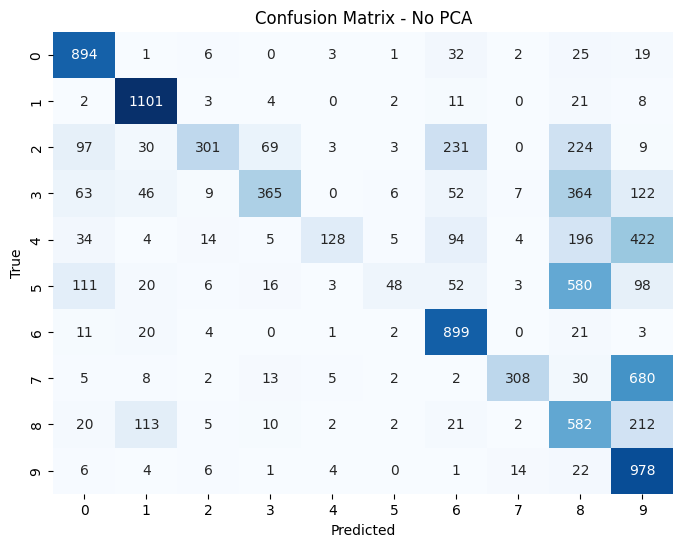

In [5]:
# 1. Without PCA
# Train the Gaussian Naive Bayes model without PCA
gnb_no_pca = GaussianNB()
gnb_no_pca.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_no_pca = gnb_no_pca.predict(X_test)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

# Print accuracy for the model without PCA
print(f"Accuracy without PCA: {accuracy_no_pca * 100:.2f}%")

# Confusion matrix for the model without PCA
conf_matrix_no_pca = confusion_matrix(y_test, y_pred_no_pca)

# Plot confusion matrix for the model without PCA
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_no_pca, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - No PCA')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Cell 4: Apply PCA and train the model with PCA



Accuracy with PCA: 86.90%


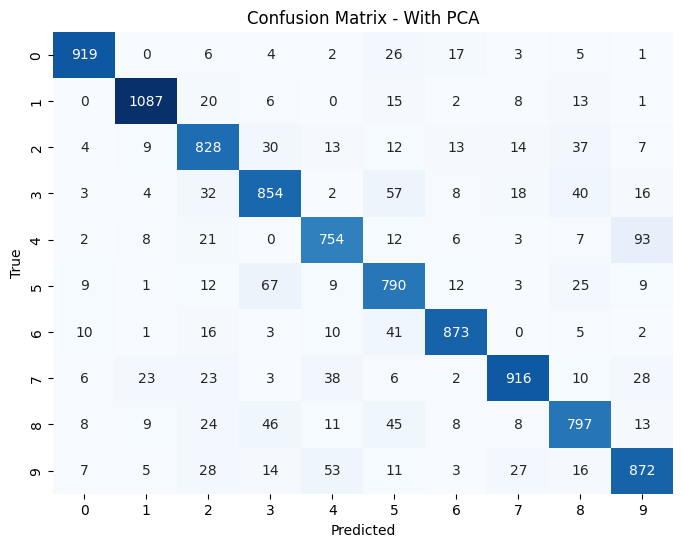

In [6]:
# 2. With PCA
# Apply PCA to reduce the dimensionality
pca = PCA(n_components=50)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the Gaussian Naive Bayes model with PCA
gnb_with_pca = GaussianNB()
gnb_with_pca.fit(X_train_pca, y_train)

# Train the Gaussian Naive Bayes model with PCA
y_pred_with_pca = gnb_with_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)

# Print accuracy for the model with PCA
print(f"Accuracy with PCA: {accuracy_with_pca * 100:.2f}%")

# Confusion matrix for the model with PCA
conf_matrix_with_pca = confusion_matrix(y_test, y_pred_with_pca)

# Plot confusion matrix for the model with PCA
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_with_pca, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - With PCA')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Cell 5: Hyperparameter tuning using GridSearchCV for the model without PCA



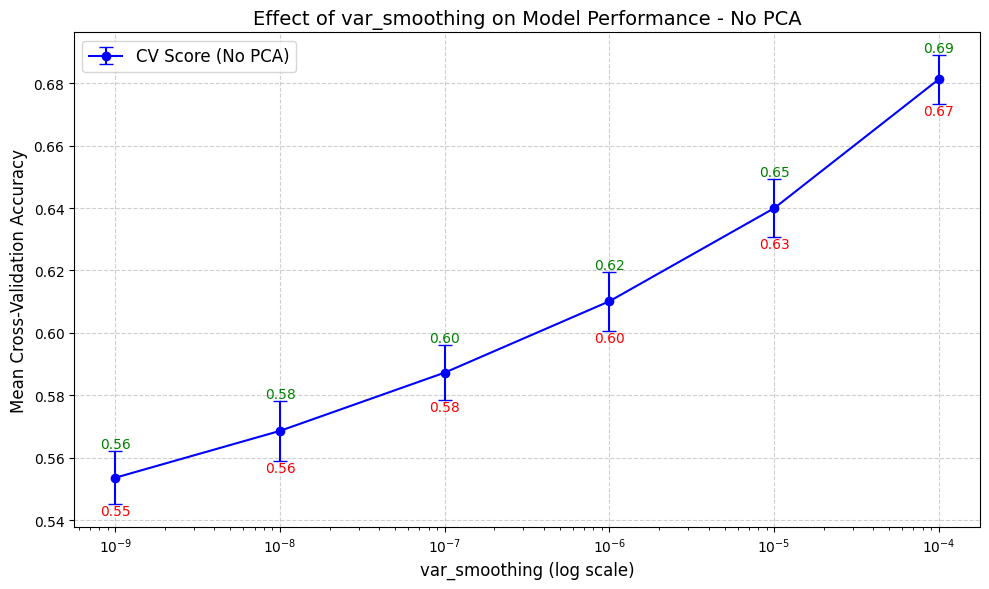

In [7]:
# Grid search for hyperparameter tuning
tuned_parameters = [{'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04]}]

# Perform GridSearchCV for the model without PCA
gs_no_pca = GridSearchCV(GaussianNB(), tuned_parameters, cv=5)
gs_no_pca.fit(X_train, y_train)

# Extract results from the grid search for the model without PCA
var_smoothing_values = tuned_parameters[0]['var_smoothing']
mean_scores_no_pca = gs_no_pca.cv_results_['mean_test_score']
std_scores_no_pca = gs_no_pca.cv_results_['std_test_score']

# Plot the effect of var_smoothing for the model without PCA
plt.figure(figsize=(10, 6))
plt.errorbar(var_smoothing_values, mean_scores_no_pca, yerr=std_scores_no_pca, fmt='-o', capsize=5, label='CV Score (No PCA)', color='blue')

# Adding error bars with text annotations
for x, mean, std in zip(var_smoothing_values, mean_scores_no_pca, std_scores_no_pca):
    lower = mean - std
    upper = mean + std
    plt.text(x, lower, f'{lower:.2f}', ha='center', va='top', fontsize=10, color='red')
    plt.text(x, upper, f'{upper:.2f}', ha='center', va='bottom', fontsize=10, color='green')

plt.xscale('log')
plt.title('Effect of var_smoothing on Model Performance - No PCA', fontsize=14)
plt.xlabel('var_smoothing (log scale)', fontsize=12)
plt.ylabel('Mean Cross-Validation Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


Cell 6: Find the optimal number of components for PCA by evaluating model performance

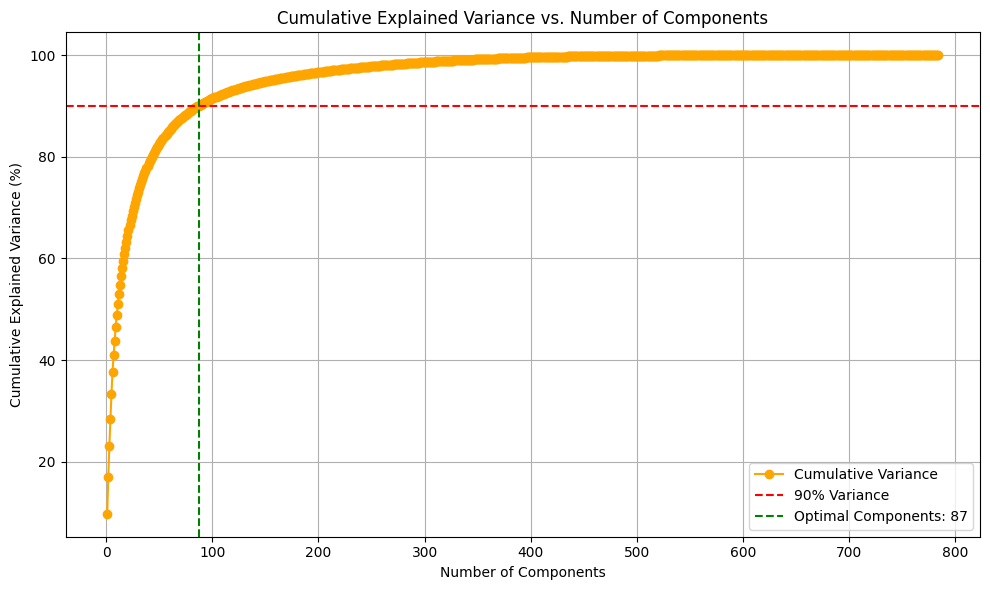

Optimal number of components for 90% variance: 87


In [15]:
# Fit PCA to data and calculate explained variance ratio
pca = PCA().fit(X_train)
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance in percentage
cumulative_variance = np.cumsum(explained_variance_ratio) * 100
# Find the optimal number of components (where cumulative variance reaches ~90%)
optimal_components = np.argmax(cumulative_variance >= 90) + 1

# Plot the Elbow graph
plt.figure(figsize=(10, 6))   
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange', label='Cumulative Variance')
plt.axhline(y=90, color='r', linestyle='--', label='90% Variance')  
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'Optimal Components: {optimal_components}')  # خط عمودی برای نمایش optimal_components
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)') 
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"Optimal number of components for 90% variance: {optimal_components}")


Cell 7: Train and Evaluate Gaussian Naive Bayes with Reduced Features Using Optimal PCA Components

In [17]:
# Load MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"]

# Split the dataset into training and testing sets (test size = 1/7 of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)

# Normalize the pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

pca = PCA(n_components=optimal_components)
X_train_reduced = pca.fit_transform(X_train)  

# Split the dataset into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_train_reduced, y_train, test_size=0.3, random_state=42)

# Train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train_reduced, y_train)

y_pred = model.predict(X_test_reduced)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Gaussian Naive Bayes model with reduced features: {accuracy * 100:.2f}%")

Accuracy of the Gaussian Naive Bayes model with reduced features: 87.21%


# Conclusion

In this project, we applied Gaussian Naive Bayes to classify the MNIST dataset, first without dimensionality reduction and then with Principal Component Analysis (PCA). The key findings include:

1. **Model Performance Without PCA**: The Gaussian Naive Bayes model performed reasonably well, providing a baseline accuracy for comparison.
   
2. **Impact of PCA**: By reducing the dataset's dimensionality, PCA not only accelerated the model's training time but also enhanced its accuracy by focusing on the most informative features.

3. **Optimal Number of Components**: The optimal number of PCA components, which provided around 90% variance, was determined through an evaluation of cumulative explained variance.

4. **Hyperparameter Tuning**: Grid search optimization of the model's hyperparameters further improved its performance, demonstrating the importance of fine-tuning for better results.

Overall, the use of PCA significantly improved model efficiency and accuracy, confirming its usefulness in reducing the computational cost of working with high-dimensional data like MNIST.
